In [1]:
!pip install --quiet qiskit
!pip install --quiet pylatexenc
!pip install --quiet qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 848.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import os, time
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, EfficientSU2
from qiskit_algorithms.optimizers import COBYLA, ADAM
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC

algorithm_globals.random_seed = 2505

In [3]:
DATA_DIR =  "/content/drive/MyDrive/UTSA Student/Spring 2024/EE5423 HW4ML/Project/dataset"
KEY2DATADIR = {
    'MNIST-2': "./MNIST-2",
    "Fashion-MNIST-2": "./Fashion-MNIST-2",
    "Fashion-MNIST-3": "./Fashion-MNIST-3",
    "Syn-Dataset-4": "./Syn-Dataset-4",
    # "Syn-Dataset-16": "./Syn-Dataset-16"
}
KEY2FULLDIR = {
    'MNIST-2': os.path.join(DATA_DIR, KEY2DATADIR['MNIST-2']),
    'Fashion-MNIST-2': os.path.join(DATA_DIR, KEY2DATADIR['Fashion-MNIST-2']),
    'Fashion-MNIST-3': os.path.join(DATA_DIR, KEY2DATADIR['Fashion-MNIST-3']),
    'Syn-Dataset-4': os.path.join(DATA_DIR, KEY2DATADIR['Syn-Dataset-4']),
    # 'Syn-Dataset-16': os.path.join(DATA_DIR, KEY2DATADIR['Syn-Dataset-16'])
}

MAX_ITERATION = 100

In [4]:
def load_dataset(data_dir: str):
    x_train_file = os.path.join(data_dir, './x_train.npy')
    y_train_file = os.path.join(data_dir, './y_train.npy')
    x_test_file = os.path.join(data_dir, './x_test.npy')
    y_test_file = os.path.join(data_dir, './y_test.npy')

    x_train = np.load(x_train_file)
    y_train = np.load(y_train_file)
    x_test = np.load(x_test_file)
    y_test = np.load(y_test_file)

    return x_train, x_test, y_train, y_test

In [5]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    # print("objective function value: {}".format(obj_func_eval))

In [6]:
def create_simpleVQC(num_features: int, max_iteration: int):
    feature_map = ZZFeatureMap(num_features)
    ansatz = EfficientSU2(num_qubits=num_features, reps=1)
    optimizer = COBYLA(maxiter=max_iteration)
    vqc = VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        loss="cross_entropy",
        optimizer=optimizer,
        callback=callback_graph
    )
    return vqc

In [7]:
simpleVQC = create_simpleVQC(num_features=4, max_iteration=10)

In [8]:
print(simpleVQC.ansatz)

     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                     ├
«     │                                                                                                      │
«q_1: ┤1                                                                                                     ├
«     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15]) │
«q_2: ┤2                                                                                                     ├
«     │                                                                                                      │
«q_3: ┤3                                                                                                     ├
«     └──────────────────────────────────────────

In [9]:
def create_complexVQC(num_features: int, max_iteration: int):
    feature_map = ZZFeatureMap(num_features)
    ansatz = EfficientSU2(num_qubits=num_features, reps=3)
    optimizer = COBYLA(maxiter=max_iteration)
    vqc = VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        loss="cross_entropy",
        optimizer=optimizer,
        callback=callback_graph
    )
    return vqc

In [10]:
complexVQC = create_complexVQC(num_features=4, max_iteration=4)

In [11]:
print(complexVQC.ansatz)

     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                     ├
«     │                                                                                                                                                                                                      │
«q_1: ┤1                                                                                                                                                                                                     ├
«     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15],θ

## MNIST-2

In [12]:
DATA_NAME = "MNIST-2"
print(os.path.exists(KEY2FULLDIR[DATA_NAME]))
DATA_DIR = KEY2FULLDIR[DATA_NAME]

True


In [13]:
x_train, x_test, y_train, y_test = load_dataset(DATA_DIR)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 2, 2)
(10, 2, 2)
(90,)
(10,)


In [14]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(90, 4)
(10, 4)


In [15]:
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
dim = x_train.shape[-1]

### Simple VQC

In [17]:
simpleVQC = create_simpleVQC(num_features=dim, max_iteration=MAX_ITERATION)

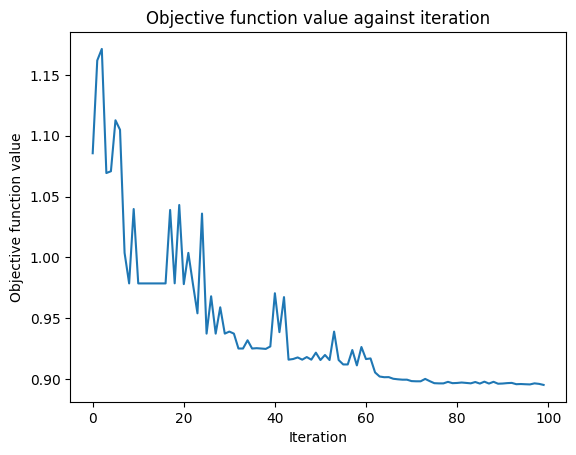

In [18]:
objective_func_vals = []
s_time = time.time()
simpleVQC.fit(x_train, y_train)
mnist2_simpleVQC_train_time = time.time() - s_time

In [19]:
mnist2_simpleVQC_train_score = simpleVQC.score(x_train, y_train)
print("QNN's training score: {}".format(mnist2_simpleVQC_train_score))

QNN's training score: 0.6888888888888889


In [20]:
mnist2_simpleVQC_test_score = simpleVQC.score(x_test, y_test)
print("QNN's testing score: {}".format(mnist2_simpleVQC_test_score))

QNN's testing score: 0.7


In [21]:
print("QNN's training time: {} (seconds)".format(mnist2_simpleVQC_train_time))

QNN's training time: 110.13933539390564 (seconds)


### Complex VQC

In [22]:
complexVQC = create_complexVQC(num_features=dim, max_iteration=MAX_ITERATION)

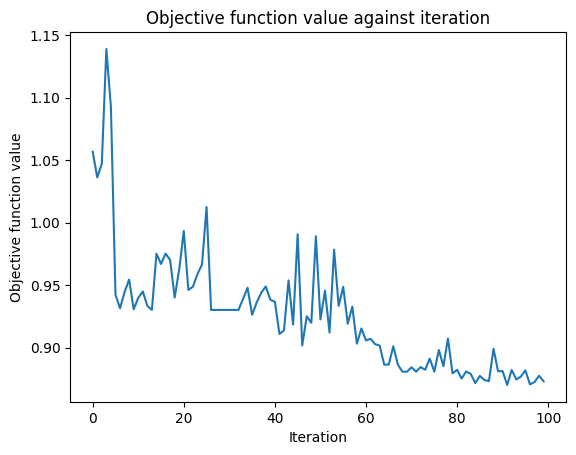

In [23]:
objective_func_vals = []
s_time = time.time()
complexVQC.fit(x_train, y_train)
mnist2_copmlexVQC_train_time = time.time() - s_time

In [24]:
mnist2_complexVQC_train_score = complexVQC.score(x_train, y_train)
print("QNN's training score: {}".format(mnist2_complexVQC_train_score))

QNN's training score: 0.7


In [25]:
mnist2_complexVQC_test_score = complexVQC.score(x_test, y_test)
print("QNN's testing score: {}".format(mnist2_complexVQC_test_score))

QNN's testing score: 0.7


In [26]:
print("QNN's training time: {} (seconds)".format(mnist2_copmlexVQC_train_time))

QNN's training time: 122.49609756469727 (seconds)


## Fashion-MNIST-2

In [27]:
DATA_NAME = "Fashion-MNIST-2"
print(os.path.exists(KEY2FULLDIR[DATA_NAME]))
DATA_DIR = KEY2FULLDIR[DATA_NAME]

True


In [28]:
x_train, x_test, y_train, y_test = load_dataset(DATA_DIR)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 2, 2)
(10, 2, 2)
(90,)
(10,)


In [29]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(90, 4)
(10, 4)


In [30]:
x_train = x_train/255.0
x_test = x_test/255.0

In [31]:
dim = x_train.shape[-1]

### Simple VQC

In [32]:
simpleVQC = create_simpleVQC(num_features=dim, max_iteration=MAX_ITERATION)

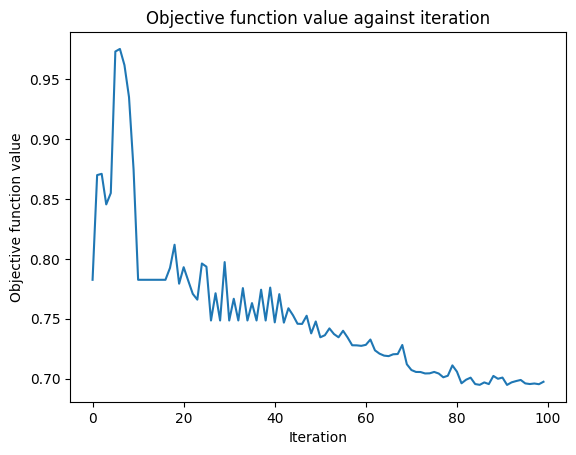

In [33]:
objective_func_vals = []
s_time = time.time()
simpleVQC.fit(x_train, y_train)
fashionmnist2_simpleVQC_train_time = time.time() - s_time

In [34]:
fashionmnist2_simpleVQC_train_score = simpleVQC.score(x_train, y_train)
print("Simple QNN's training score: {}".format(fashionmnist2_simpleVQC_train_score))

Simple QNN's training score: 0.8666666666666667


In [35]:
fashionmnist2_simpleVQC_test_score = simpleVQC.score(x_test, y_test)
print("Simple QNN's testing score: {}".format(fashionmnist2_simpleVQC_test_score))

Simple QNN's testing score: 0.8


In [36]:
print("Simple QNN's training time: {} (seconds)".format(fashionmnist2_simpleVQC_train_time))

Simple QNN's training time: 99.22222208976746 (seconds)


### Complex VQC

In [37]:
complexVQC = create_complexVQC(num_features=dim, max_iteration=MAX_ITERATION)

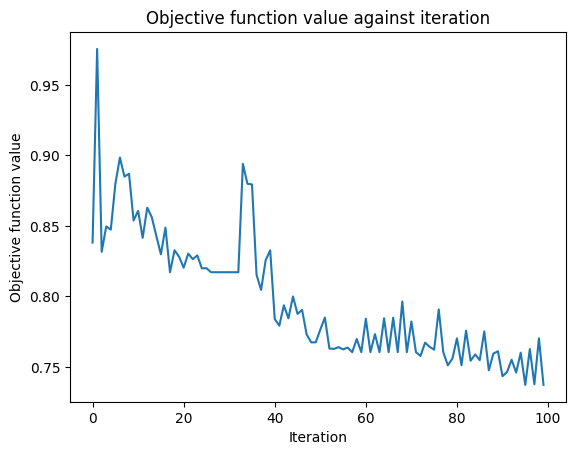

In [38]:
objective_func_vals = []
s_time = time.time()
complexVQC.fit(x_train, y_train)
fashionmnist2_copmlexVQC_train_time = time.time() - s_time

In [39]:
fashionmnist2_complexVQC_train_score = complexVQC.score(x_train, y_train)
print("Complex QNN's training score: {}".format(fashionmnist2_complexVQC_train_score))

Complex QNN's training score: 0.7666666666666667


In [40]:
fashionmnist2_complexVQC_test_score = complexVQC.score(x_test, y_test)
print("Complex QNN's testing score: {}".format(fashionmnist2_complexVQC_test_score))

Complex QNN's testing score: 0.7


In [41]:
print("Complex QNN's training time: {} (seconds)".format(fashionmnist2_copmlexVQC_train_time))

Complex QNN's training time: 122.74086618423462 (seconds)


## Fashion-MNIST-3

In [42]:
DATA_NAME = "Fashion-MNIST-3"
print(os.path.exists(KEY2FULLDIR[DATA_NAME]))
DATA_DIR = KEY2FULLDIR[DATA_NAME]

True


In [43]:
x_train, x_test, y_train, y_test = load_dataset(DATA_DIR)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 2, 2)
(15, 2, 2)
(135,)
(15,)


In [44]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(135, 4)
(15, 4)


In [45]:
x_train = x_train/255.0
x_test = x_test/255.0

In [46]:
dim = x_train.shape[-1]

### Simple VQC

In [47]:
simpleVQC = create_simpleVQC(num_features=dim, max_iteration=MAX_ITERATION)

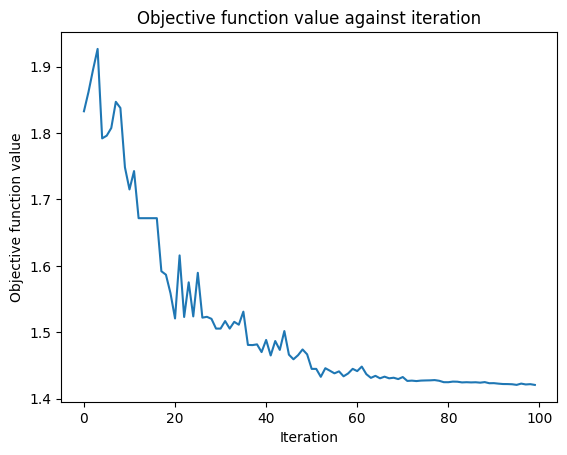

In [48]:
objective_func_vals = []
s_time = time.time()
simpleVQC.fit(x_train, y_train)
fashionmnist3_simpleVQC_train_time = time.time() - s_time

In [49]:
fashionmnist3_simpleVQC_train_score = simpleVQC.score(x_train, y_train)
print("Simple QNN's training score: {}".format(fashionmnist3_simpleVQC_train_score))

Simple QNN's training score: 0.5481481481481482


In [50]:
fashionmnist3_simpleVQC_test_score = simpleVQC.score(x_test, y_test)
print("Simple QNN's testing score: {}".format(fashionmnist3_simpleVQC_test_score))

Simple QNN's testing score: 0.4


In [51]:
print("Simple QNN's training time: {} (seconds)".format(fashionmnist3_simpleVQC_train_time))

Simple QNN's training time: 133.89259910583496 (seconds)


### Complex VQC

In [52]:
complexVQC = create_complexVQC(num_features=dim, max_iteration=MAX_ITERATION)

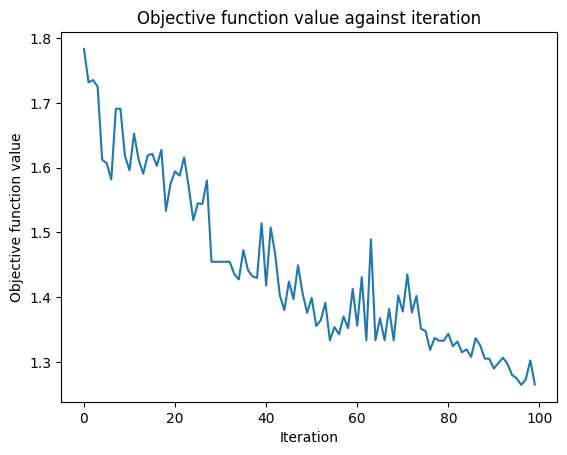

In [53]:
objective_func_vals = []
s_time = time.time()
complexVQC.fit(x_train, y_train)
fashionmnist3_copmlexVQC_train_time = time.time() - s_time

In [54]:
fashionmnist3_complexVQC_train_score = complexVQC.score(x_train, y_train)
print("Complex QNN's training score: {}".format(fashionmnist3_complexVQC_train_score))

Complex QNN's training score: 0.5777777777777777


In [55]:
fashionmnist3_complexVQC_test_score = complexVQC.score(x_test, y_test)
print("Complex QNN's testing score: {}".format(fashionmnist3_complexVQC_test_score))

Complex QNN's testing score: 0.3333333333333333


In [56]:
print("Complex QNN's training time: {} (seconds)".format(fashionmnist3_copmlexVQC_train_time))

Complex QNN's training time: 168.71460056304932 (seconds)


## Synthetic-4

In [57]:
DATA_NAME = "Syn-Dataset-4"
print(os.path.exists(KEY2FULLDIR[DATA_NAME]))
DATA_DIR = KEY2FULLDIR[DATA_NAME]

True


In [58]:
x_train, x_test, y_train, y_test = load_dataset(DATA_DIR)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(10, 4)
(90,)
(10,)


In [59]:
dim = x_train.shape[-1]

### Simple QNN

In [60]:
simpleVQC = create_simpleVQC(num_features=dim, max_iteration=MAX_ITERATION)

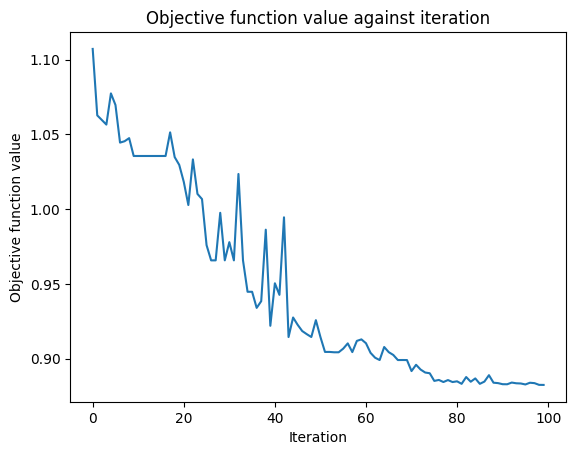

In [61]:
objective_func_vals = []
s_time = time.time()
simpleVQC.fit(x_train, y_train)
synthetic4_simpleVQC_train_time = time.time() - s_time

In [62]:
synthetic4_simpleVQC_train_score = simpleVQC.score(x_train, y_train)
print("Simple VQC's training score: {}".format(synthetic4_simpleVQC_train_score))

Simple VQC's training score: 0.7111111111111111


In [63]:
synthetic4_simpleVQC_test_score = simpleVQC.score(x_test, y_test)
print("Simple VQC's testing score: {}".format(synthetic4_simpleVQC_test_score))

Simple VQC's testing score: 0.5


In [64]:
print("Simple VQC's training time: {} (seconds)".format(synthetic4_simpleVQC_train_time))

Simple VQC's training time: 101.59266996383667 (seconds)


### Complex VQC

In [65]:
complexVQC = create_complexVQC(num_features=dim, max_iteration=MAX_ITERATION)

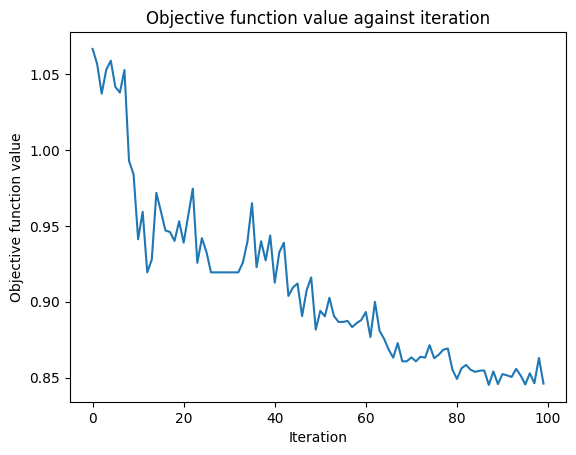

In [66]:
objective_func_vals = []
s_time = time.time()
complexVQC.fit(x_train, y_train)
synthetic4_complexVQC_train_time = time.time() - s_time

In [67]:
synthetic4_complexVQC_train_score = complexVQC.score(x_train, y_train)
print("Complex QNN's training score: {}".format(synthetic4_complexVQC_train_score))

Complex QNN's training score: 0.7444444444444445


In [68]:
synthetic4_complexVQC_test_score = complexVQC.score(x_test, y_test)
print("Complex QNN's testing score: {}".format(synthetic4_complexVQC_test_score))

Complex QNN's testing score: 0.7


In [69]:
print("Complex QNN's training time: {} (seconds)".format(synthetic4_complexVQC_train_time))

Complex QNN's training time: 125.12200379371643 (seconds)
